# Week3 KNN 


## Data Load

In [54]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt   
import seaborn as sns 

In [55]:
#경고 메세지는 무시
import warnings
warnings.filterwarnings("ignore")

In [202]:
# Black Friday Sale Prediction
blackfriday = pd.read_csv("blackfriday.csv")
blackfriday.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## Preprocessing / EDA

In [217]:
### X, y 나누기
X = blackfriday.iloc[:,4:]
y = pd.DataFrame(blackfriday['Gender'])

In [218]:
# X = X.drop(['Unnamed: 0'], axis = 1)
X

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,10,A,3,0,5,17.0,NaN,2010
1,0-17,10,A,1,0,7,NaN,NaN,4483
2,0-17,10,A,1,0,1,4.0,NaN,7696
3,0-17,10,A,3,0,2,4.0,NaN,16429
4,0-17,10,A,3,0,3,5.0,NaN,5780
...,...,...,...,...,...,...,...,...,...
4993,55+,7,C,1,1,1,16.0,NaN,11701
4994,55+,1,C,1,1,8,NaN,NaN,2045
4995,55+,13,C,3,1,1,6.0,14.0,4505
4996,55+,0,C,2,1,12,NaN,NaN,1413


In [220]:
y

,Gender
0,F
1,F
2,F
3,F
4,F
...,...
4993,M
4994,M
4995,M
4996,M


In [221]:
### 결측치 확인

# 각 feature마다 결측치 확인 -> Product_Category_1, Product_Category_2 가 유일하게 결측치 가지고 있음
X.isnull().sum()

Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [222]:
## 결측치 제거

# Product_Category_1, Product_Category_2 결측치 0으로 변환
# X.fillna(0, inplace = True)

# 총 4998 개의 데이터 중 Product_Category_1은 결측치가 30%, Product_Category_3은 결측치가 68% 이다
# 때문에 Prduct_Category_3는 제거, Product_Category_2는 0으로 변환하기로 결정

X = X.drop(['Product_Category_3'], axis =1)
X.fillna(0, inplace=True)
X.head()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0-17,10,A,3,0,5,17.0,2010
1,0-17,10,A,1,0,7,0.0,4483
2,0-17,10,A,1,0,1,4.0,7696
3,0-17,10,A,3,0,2,4.0,16429
4,0-17,10,A,3,0,3,5.0,5780


In [223]:
# # ID 변수들도 삭제하기
# X = X.drop('User_ID', axis=1)
# X = X.drop('Product_ID', axis=1)

In [224]:
X.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4998 non-null   object 
 1   Occupation                  4998 non-null   int64  
 2   City_Category               4998 non-null   object 
 3   Stay_In_Current_City_Years  4998 non-null   object 
 4   Marital_Status              4998 non-null   int64  
 5   Product_Category_1          4998 non-null   int64  
 6   Product_Category_2          4998 non-null   float64
 7   Purchase                    4998 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 312.5+ KB


In [225]:
# Categorical 변수들 중 Product_Category_2는 float type
# 해당 변수들의 unique한 값들 뽑아 데이터 살펴보기

print(X['Product_Category_2'].unique())
# 모두 정수로 이루어진 데이터라는 것을 확인

[17.  0.  4.  5. 15.  8. 12. 11.  2. 14.  3. 18. 16.  6. 13. 10.  9.  7.]


In [226]:
# Product_Category_2 데이터형 int type로 변환하기
X['Product_Category_2'] = X['Product_Category_2'].astype('int64')

X.info() #변수형 잘 바뀌었는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         4998 non-null   object
 1   Occupation                  4998 non-null   int64 
 2   City_Category               4998 non-null   object
 3   Stay_In_Current_City_Years  4998 non-null   object
 4   Marital_Status              4998 non-null   int64 
 5   Product_Category_1          4998 non-null   int64 
 6   Product_Category_2          4998 non-null   int64 
 7   Purchase                    4998 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.5+ KB


In [227]:
print(X['Product_Category_1'].unique())
print(X['Product_Category_2'].unique())

[ 5  7  1  2  3  8 16 14 10 19 11 12  4 17 15  6 13 20 18  9]
[17  0  4  5 15  8 12 11  2 14  3 18 16  6 13 10  9  7]


In [228]:
# Stay_In_Current_City_Years 에서 4+로 표기되어 있는 것을 4년으로 바꾸어주기
X['Stay_In_Current_City_Years'] = X['Stay_In_Current_City_Years'].replace('4+',4)

# Stay_In_Current_City_Years 정수형으로 연수 나타내기
X['Stay_In_Current_City_Years'] = X['Stay_In_Current_City_Years'].astype('int64')

X.info() #변수형 잘 바뀌었는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         4998 non-null   object
 1   Occupation                  4998 non-null   int64 
 2   City_Category               4998 non-null   object
 3   Stay_In_Current_City_Years  4998 non-null   int64 
 4   Marital_Status              4998 non-null   int64 
 5   Product_Category_1          4998 non-null   int64 
 6   Product_Category_2          4998 non-null   int64 
 7   Purchase                    4998 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 312.5+ KB


<AxesSubplot:>

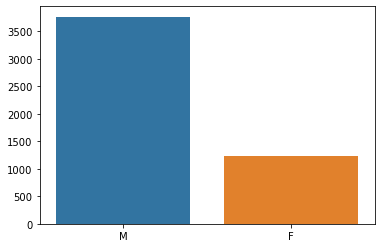

In [235]:
## 변수별 분포 살펴보기 - Gender
gender = y.Gender.value_counts()
sns.barplot(gender.index, gender.values)
#소비자들의 성별 살펴보기
#남성 소비자가 여성 소비자들보다 월등히 많은 것을 확인

In [236]:
## 변수별 분포 살펴보기 - Age

X.Age.value_counts() #각 나이대의 소비자 수 살펴보기

26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64

<AxesSubplot:>

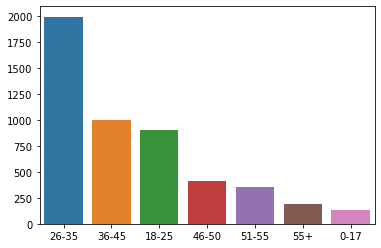

In [237]:
age = X.Age.value_counts()
sns.barplot(age.index, age.values)
# 20대 소비자들이 가장 많다는 것을 확인할 수 있고, 55세 이상과 0-17세가 가장 적은 수를 보였다

<AxesSubplot:xlabel='Age', ylabel='count'>

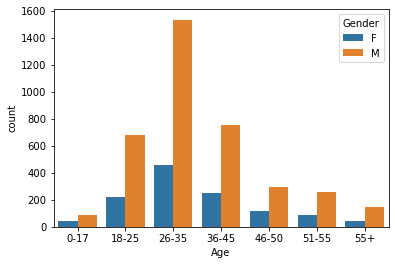

In [238]:
## 나이대별로 성비 살펴보기

sns.countplot(blackfriday.Age, hue = blackfriday.Gender)
# 남성 소비자들이 더 많지만 나이대별 소비자 수의 분포는 비슷한 경향을 보이는 것을 확인할 수 있다

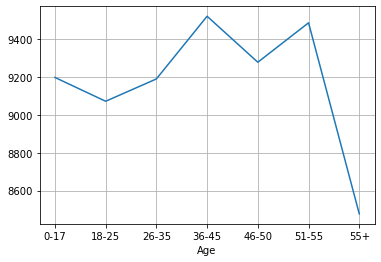

In [243]:
### 나이대별 소비 살펴보기

avg_spent = blackfriday.groupby('Age').mean().Purchase
avg_spent.plot()
plt.grid()

# 각 나이대별 평균 소비 분포 시각화
# 소비자는 26-35>36-45>18-25>46-50>51-55>55+>0-17 순으로 제일 많지만 평균 소비액은 36-45와 51-55세의 소비자들이 가장 많은 것을 확인할 수 있다

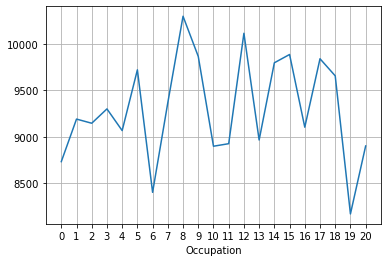

In [244]:
## Occupation 분포 살펴보기
# 어떤 직업이 소비가 많은지 살펴보기

occup_spent = blackfriday.groupby('Occupation').mean().Purchase

plt.xticks(occup_spent.index)
occup_spent.plot()
plt.grid()
# 8, 12 번 Occupation이 가장 높은 평균 소비량을 보이고 6, 19 Occupation이 가장 낮은 평균 소비를 가지고 있는 것을 확인할 수 있다
# 직업별 평균 소비금액은 최대 $2,000 정도가 차이가 나는 것을 확인할 수 있다

<AxesSubplot:>

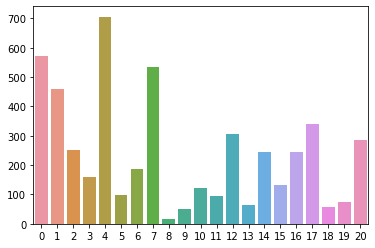

In [245]:
## 각 Occupation의 소비자 수 살펴보기

occup_cust = blackfriday.Occupation.value_counts()
sns.barplot(occup_cust.index, occup_cust.values)
# 4번 Occupation을 가진 소비자들이 가장 많은 것을 확인할 수 있고, 
# 8번 Occupation의 소비자들이 가장 적은 것을 확인할 수 있다

<AxesSubplot:xlabel='Occupation', ylabel='count'>

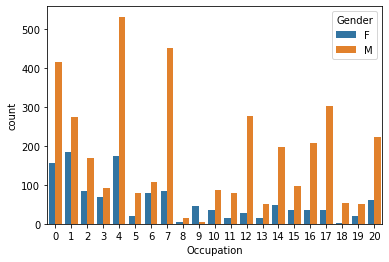

In [271]:
sns.countplot(blackfriday.Occupation, hue = blackfriday.Gender)
# 각 Occupation Gender 별 소비자 파악

In [246]:
# 성별 -> 여자는 1, 남지는 0으로 형변환하기

y['Gender'] = y['Gender'].replace('F', 1)
y['Gender'] = y['Gender'].replace('M', 0)

X.info() #변수형 잘 변환되었는지 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         4998 non-null   object
 1   Occupation                  4998 non-null   int64 
 2   City_Category               4998 non-null   object
 3   Stay_In_Current_City_Years  4998 non-null   int64 
 4   Marital_Status              4998 non-null   int64 
 5   Product_Category_1          4998 non-null   int64 
 6   Product_Category_2          4998 non-null   int64 
 7   Purchase                    4998 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 312.5+ KB


In [247]:
# 나이 정수형으로 변환하기

X['Age'] = X['Age'].map({'0-17':0,'18-25':1,
                          '26-35':2,'36-45':3,
                          '46-50':4,'51-55':5,
                          '55+':6})
X.info() #변수형 잘 변환되었는지 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         4998 non-null   int64 
 1   Occupation                  4998 non-null   int64 
 2   City_Category               4998 non-null   object
 3   Stay_In_Current_City_Years  4998 non-null   int64 
 4   Marital_Status              4998 non-null   int64 
 5   Product_Category_1          4998 non-null   int64 
 6   Product_Category_2          4998 non-null   int64 
 7   Purchase                    4998 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 312.5+ KB


<AxesSubplot:>

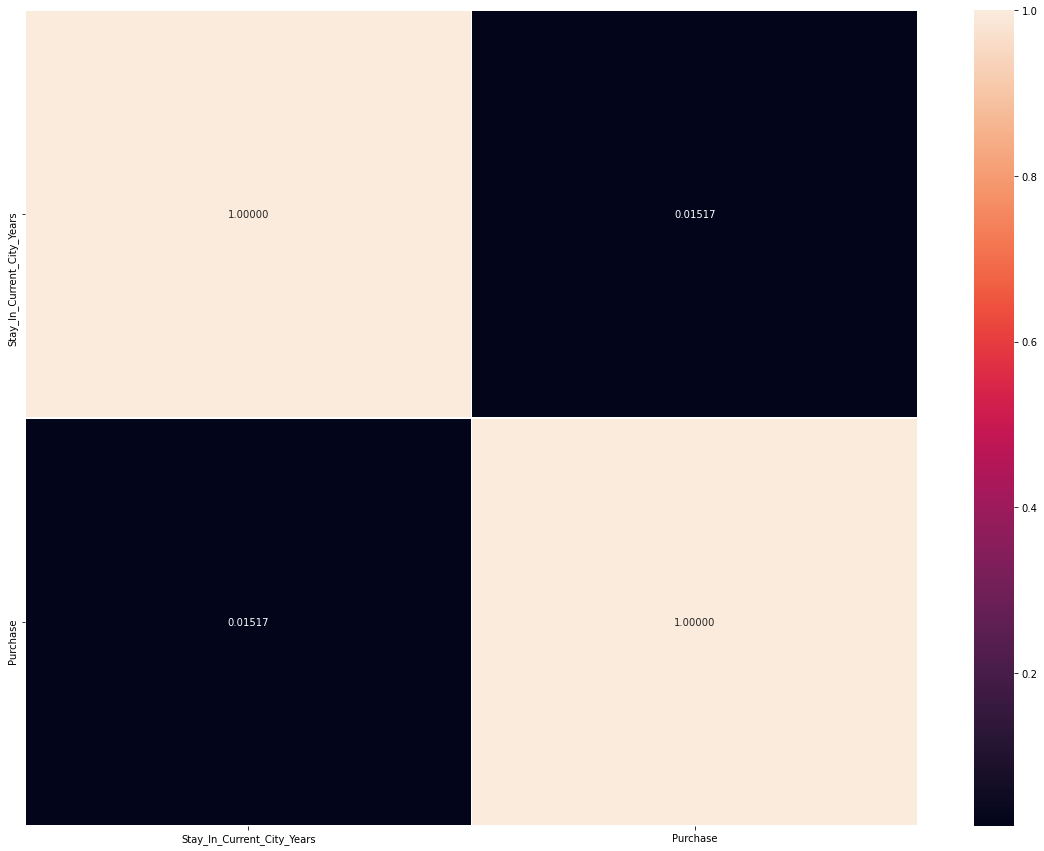

In [248]:
## 변수들의 상관관계 살펴보기
continuous = X[['Stay_In_Current_City_Years', 'Purchase']]
plt.subplots(figsize = (20,15))
sns.heatmap(data = continuous.corr().abs(), annot=True, fmt = '.5f', linewidths=.5)
# 연속형 변수 Age와 Stay_In_Current_City_Years 변수와의 상관관계를 보았을 때 서로 독립을 가진다고 판단할 수 있다(상관관계가 낮다)

In [108]:
# # Purchase와 다른 변수간의 상관관계 분석
# purchase_corr = blackfriday.corr()['Purchase']
# sns.barplot(purchase_corr.index, purchase_corr.values)
# plt.xticks(rotation = 45)
# # Product_Category_1 와 Purchase가 다른 변수들에 비해 높은 음의 상관관계를 보이지만 product category 1,2,3는 범주형 변수이므로 해당 값들에 대해 encoding이 필요할 것 같음 

In [249]:
## Categorical Variables


cat = ['Occupation', 'City_Category','Marital_Status','Product_Category_1', 'Product_Category_2'] 
num = X.columns.drop(cat)
# 범주형 변수 encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

X = pd.get_dummies(data = X, columns = cat)

In [250]:
X.iloc[:,2:]

,Purchase,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,...,Product_Category_2_9,Product_Category_2_10,Product_Category_2_11,Product_Category_2_12,Product_Category_2_13,Product_Category_2_14,Product_Category_2_15,Product_Category_2_16,Product_Category_2_17,Product_Category_2_18
0,2010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4483,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7696,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16429,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5780,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,11701,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4994,2045,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4995,4505,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,1413,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
X_categorical = X.iloc[:,2:]

In [251]:
## Numerical Variables
X_numerical = pd.DataFrame(X[num])
X_numerical 

,Age,Stay_In_Current_City_Years,Purchase
0,0,3,2010
1,0,1,4483
2,0,1,7696
3,0,3,16429
4,0,3,5780
...,...,...,...
4993,6,1,11701
4994,6,1,2045
4995,6,3,4505
4996,6,2,1413


In [252]:
## 모델에 적용하기 이전에 데이터 정규화시키기

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_numerical)
X_num_scaled = pd.DataFrame(X_num_scaled, columns = X_numerical.columns)
X_num_scaled


,Age,Stay_In_Current_City_Years,Purchase
0,-1.844436,0.890850,-1.445300
1,-1.844436,-0.667592,-0.950574
2,-1.844436,-0.667592,-0.307810
3,-1.844436,0.890850,1.439236
4,-1.844436,0.890850,-0.691107
...,...,...,...
4993,2.589663,-0.667592,0.493395
4994,2.589663,-0.667592,-1.438298
4995,2.589663,0.890850,-0.946172
4996,2.589663,0.111629,-1.564730


In [253]:
X = pd.concat([X_num_scaled, X_categorical], axis = 1)

## Model 
Hyperparameter Tuning with Grid Search CV

In [254]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=48)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3498, 67) (1500, 67) (3498, 1) (1500, 1)


In [256]:
X_train.head()

,Age,Stay_In_Current_City_Years,Purchase,Stay_In_Current_City_Years,Marital_Status,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,...,Product_Category_2_9,Product_Category_2_10,Product_Category_2_11,Product_Category_2_12,Product_Category_2_13,Product_Category_2_14,Product_Category_2_15,Product_Category_2_16,Product_Category_2_17,Product_Category_2_18
4715,1.850646,0.111629,-1.010389,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2898,-0.366403,-0.667592,0.529404,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1618,-0.366403,-0.667592,1.358415,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2926,-0.366403,-0.667592,2.162020,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4310,1.111630,-0.667592,-0.450846,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Grid Search


In [263]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier

grid_params = {
    'n_neighbors': [1, 3, 5, 7, 9, 11], # K 값 주로 홀수로 지정해준다
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan','mahalanobis']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, ) #3fold Cross Validation
gs_result = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   16.4s finished


In [264]:
gs_result.cv_results_

{'mean_fit_time': array([0.03868055, 0.04032993, 0.03700987, 0.03766791, 0.03668841,
        0.04967745, 0.0376788 , 0.03969932, 0.03801131, 0.03602537,
        0.03700074, 0.03765551, 0.03786802, 0.03901203, 0.04032882,
        0.03866386, 0.03999925, 0.03901243, 0.03702362, 0.03670287,
        0.03867984, 0.03665272, 0.03735463, 0.03699954, 0.00633391,
        0.00604375, 0.00698558, 0.0070107 , 0.0066661 , 0.00700124,
        0.00599933, 0.0069991 , 0.00598375, 0.0073092 , 0.00634821,
        0.00668025]),
 'std_fit_time': array([3.07484962e-03, 3.30945243e-03, 8.28525118e-04, 9.69072571e-04,
        4.78758689e-04, 1.79044357e-02, 1.23066021e-03, 9.43584051e-04,
        2.17378299e-03, 1.54970039e-05, 8.15756298e-04, 9.51741253e-04,
        2.25927721e-03, 1.42369017e-03, 1.90873031e-03, 3.06648879e-03,
        8.17508927e-04, 8.17557877e-04, 8.42274326e-04, 1.24668399e-03,
        1.26043956e-03, 9.55329141e-04, 4.81900525e-04, 8.01391116e-04,
        4.42732552e-04, 7.86741172e-0

In [265]:
print(gs_result.best_score_)
print(gs_result.best_params_)

0.7567181246426529
{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [268]:
## Grid Search 기반으로 최종 모델 만들기

knn_cl = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 11, weights= 'distance')

In [269]:
# train model
knn_cl.fit(X_train, y_train) 

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

## Evaluation

In [270]:
print("Accuracy: {:.4f}".format(knn_cl.score(X_test, y_test)))

Accuracy: 0.7467
